In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

In [2]:
def compute_purity(y_train, y_train_predict, y_actual, y_predict, y_label):
    
    cluster_label_map = dict()
    unique, counts = np.unique(y_train_predict, return_counts=True)
    cluster_dict = dict(zip(unique, counts))
    class_dict = dict()
    y_list = y_train[y_label].tolist()
    for i in y_train[y_label].unique():
        class_dict[i] = y_list.count(i)
    while cluster_dict:
        cluster = max(cluster_dict,key=cluster_dict.get)
        clas = max(class_dict,key=class_dict.get)
        cluster_label_map[cluster] = clas
        del cluster_dict[cluster]
        del class_dict[clas]
    y_pred = map(lambda x : cluster_label_map[x], y_predict)
    y_act = y_actual[y_label].tolist()
    
    correct = 0
    for i in range(0,len(y_act)):
        if y_act[i] == y_pred[i]:
            correct += 1
    purity = float(correct)/float(len(y_act))
    return purity

In [3]:
def plot_dendrogram(model, **kwargs):

    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [4]:
data = pd.read_csv("compressed_intrusion_data_b_1.csv",header=None)
heading = list()
for i in range(1,15):
    heading.append('A'+str(i))
heading.append('xAttack')
data.columns = heading
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,xAttack
0,0.999149,0.999867,0.999429,0.999334,0.998381,0.998826,0.999541,0.999238,0.999514,0.998777,0.997445,0.998937,0.999775,0.998463,dos
1,0.998301,0.999586,0.997900,0.999288,0.998980,0.999239,0.999535,0.999056,0.999458,0.997825,0.999055,0.999059,0.999442,0.997508,dos
2,0.996715,0.999078,0.997015,0.999075,0.998354,0.998890,0.999084,0.998914,0.998800,0.996250,0.998779,0.995177,0.999393,0.993560,normal
3,0.997598,0.999185,0.997257,0.998707,0.998721,0.998609,0.999049,0.998410,0.999241,0.996663,0.998553,0.996523,0.999378,0.994977,normal
4,0.999287,0.999792,0.998719,0.999638,0.999383,0.999291,0.999736,0.999300,0.999792,0.998496,0.999212,0.999503,0.999731,0.998759,probe


In [5]:
cols = list()
for i in range(1,15):
    cols.append('A'+str(i))
X_train, X_test, y_train, y_test = train_test_split(
    data[cols],
    data[['xAttack']],
    test_size=0.3,
    random_state=0)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
8293,0.997670,0.999191,0.997461,0.998923,0.998688,0.998729,0.999146,0.998713,0.999155,0.996688,0.998785,0.996200,0.999350,0.994706
23442,0.997417,0.999060,0.997199,0.998791,0.998419,0.998403,0.999042,0.998551,0.998998,0.996353,0.998597,0.995799,0.999197,0.994226
13790,0.998996,0.999835,0.999337,0.999307,0.998470,0.998780,0.999467,0.999156,0.999500,0.998709,0.997409,0.998758,0.999763,0.998214
4477,0.996000,0.999307,0.996788,0.998649,0.998312,0.998637,0.999113,0.998796,0.998817,0.997017,0.998827,0.996859,0.999380,0.995428
708,0.996381,0.999435,0.997565,0.999323,0.998880,0.999219,0.999233,0.999049,0.998921,0.996827,0.999037,0.996888,0.999649,0.993974


In [6]:
agg = AgglomerativeClustering(n_clusters=5)
y_pred_tr_agg = agg.fit_predict(X_train)
y_pred_ts_agg = agg.fit_predict(X_test)

In [7]:
train_purity = compute_purity(y_train, y_pred_tr_agg, y_train, y_pred_tr_agg, 'xAttack')
test_purity = compute_purity(y_train, y_pred_tr_agg, y_test, y_pred_ts_agg, 'xAttack')
print '******************** Agglomerative Clustering ********************************'
print 'Train data set purity : '+str(round(train_purity*100,2))+'%'
print 'Test data set purity : '+str(round(test_purity*100,2))+'%'

******************** Agglomerative Clustering ********************************
Train data set purity : 56.42%
Test data set purity : 17.11%


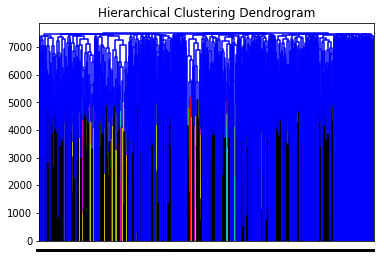

In [8]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg, labels=agg.labels_)
plt.show()